<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" alt=""></a></span></li><li><span><a href="#Capstone-Project---Planet-Jordan" data-toc-modified-id="Capstone-Project---Planet-Jordan-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Capstone Project - Planet Jordan</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Dictionary</a></span></li></ul></li></ul></div>

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)

# Capstone Project - Planet Jordan

## EDA

In [1]:
# Import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set_style(style='darkgrid')

## Data Dictionary

| Glossary     	|                                                                                                                    	|
|--------------	|--------------------------------------------------------------------------------------------------------------------	|
|              	|                                                                                                                    	|
| Night        	| One paid-for night at a hotel.                                                                                     	|
| Stay         	| A members stay at a hotel.    One stay can be made up of multiple nights.                                          	|
| Booking      	| A booking made by a member for a hotel stay.  Note that a booking may be cancelled or the   member may not show.   	|
| Actual stay  	| A stay that is actually made (consumed) by a member (as   opposed to a booking).                                   	|
| Room revenue 	| Revenue from the room booking portion of a member's stay   (excluding food, drinks, room service, telephone, etc.) 	|
| ADR          	| Average Daily Rate.    Average income per occupied room.                                                           	|
| E-mailable   	| Loyalty members whose e-mail address is known to the client   (for marketing purposes).                            	|
| SMS-able     	| Loyalty members whose mobile phone number is known to the   client (for marketing purposes).                       	|
| Lead time    	| The period of time between a member's date of booking and   planned data of stay.                                  	|

In [2]:
# reading in dataset
df = pd.read_csv('./data/data_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103022 entries, 0 to 103021
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mem_id               103022 non-null  int64  
 1   mem_type             103022 non-null  object 
 2   email                103022 non-null  object 
 3   sms                  103022 non-null  object 
 4   mem_city             103022 non-null  object 
 5   mem_tier             103022 non-null  int64  
 6   booking_dt           103022 non-null  object 
 7   conf_dt              103022 non-null  object 
 8   ck_in_dt             103022 non-null  object 
 9   ck_out_dt            103022 non-null  object 
 10  rm_typ               103022 non-null  object 
 11  chain_cd             103022 non-null  object 
 12  mnemonic_cd          103022 non-null  int64  
 13  hotel_cluster        103022 non-null  object 
 14  hotel_name           103022 non-null  object 
 15  hotel_city       

In [4]:
# convert the appropriate columns into date time object
df['booking_dt'] = pd.to_datetime(df["booking_dt"])
df['conf_dt'] = pd.to_datetime(df["conf_dt"])
df['ck_in_dt'] = pd.to_datetime(df["ck_in_dt"])
df['ck_out_dt'] = pd.to_datetime(df["ck_out_dt"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103022 entries, 0 to 103021
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mem_id               103022 non-null  int64         
 1   mem_type             103022 non-null  object        
 2   email                103022 non-null  object        
 3   sms                  103022 non-null  object        
 4   mem_city             103022 non-null  object        
 5   mem_tier             103022 non-null  int64         
 6   booking_dt           103022 non-null  datetime64[ns]
 7   conf_dt              103022 non-null  datetime64[ns]
 8   ck_in_dt             103022 non-null  datetime64[ns]
 9   ck_out_dt            103022 non-null  datetime64[ns]
 10  rm_typ               103022 non-null  object        
 11  chain_cd             103022 non-null  object        
 12  mnemonic_cd          103022 non-null  int64         
 13  hotel_cluster 

In [6]:
df.head()

,mem_id,mem_type,email,sms,mem_city,mem_tier,booking_dt,conf_dt,ck_in_dt,ck_out_dt,...,hotel_name,hotel_city,hotel_tier,count_as_stay,count_as_bkg,nights_stayed,rm_rev_amt,rm_rev_usd_amt,rm_rev_usd_bdgt,tot_sty_rev_usd_amt
0,100000001,PLTN,N,Y,SHANGHAI,1,2012-07-26,2012-09-06,2012-09-07,2012-09-08,...,Shanghai Urban Jordan,SHANGHAI,1,1,1,1,0.0,0.00,0.000000,0.00
1,100000002,PLTN,N,Y,SHANGHAI,1,2012-07-26,2012-09-03,2012-09-07,2012-09-08,...,Shanghai Urban Jordan,SHANGHAI,1,1,1,1,600.0,94.51,94.466276,179.57
2,100000003,PLTN,Y,Y,CHONGQING,2,2012-08-22,2012-09-04,2012-09-14,2012-09-16,...,Jiuzhai Pippen,JIUZHAIGOU,2,1,1,2,2733.6,430.59,430.388352,0.00
3,100000004,PLTN,Y,Y,CHONGQING,2,2012-08-22,2012-09-04,2012-09-21,2012-09-23,...,Jiuzhai Pippen,JIUZHAIGOU,2,1,1,2,0.0,0.00,0.000000,0.00
4,100000005,PLTN,Y,Y,CHENGDU,2,2012-07-26,2012-09-06,2012-09-07,2012-09-08,...,Chengdu Pippen,CHENGDU,2,1,1,1,952.8,150.08,150.012446,172.60


**Most of the features are self-explanatory. There are a few, though, that we like to take a closer look and they are:**
- mnemonic_cd
- count_as_stay
- count_as_bkg
- rm_rev_amt
- rm_rev_usd_amt
- rm_rev_usd_bdgt
- tot_sty_rev_usd_amt

In [7]:
# Checking column mnemonic_cd
df.mnemonic_cd.value_counts()

33    6608
8     5263
15    5037
5     4814
10    4368
      ... 
83     112
82     112
81     112
80     112
77     111
Name: mnemonic_cd, Length: 82, dtype: int64

**We made some searches but couldn't find anything that could help us make an educated guess of what this feature is so we will drop it for now**

In [8]:
# Checking column count_as_stay
df['count_as_stay'].value_counts()

1    102911
0       111
Name: count_as_stay, dtype: int64

In [9]:
# Checking column count_as_bkg
df['count_as_bkg'].value_counts()

1    86576
0    16446
Name: count_as_bkg, dtype: int64

**According to the glossary, these 2 features are used as a counter to keep track of whether a booking materialised into a stay but since the data given are data of stays (because there is no null in the column check in date meaning every entry in this dataset has the customer checked in and stayed), these 2 features will not be needed and will be dropped**

In [10]:
# Finding the relation between rm_rev_amt and rm_rev_usd_amt
df['change'] = df['rm_rev_amt'] / df['rm_rev_usd_amt']
df['change'].value_counts()

6.362153    2688
6.361829    1568
6.348596    1344
6.347915    1344
6.348580    1231
            ... 
6.361655     111
6.362364     111
6.361143     111
6.348477     111
6.361323     111
Name: change, Length: 423, dtype: int64

**We divided rm_rev_amt by rm_rev_usd_amt and found that the change is pretty consistent around 6.34. We confirmed the definition from glossary and assume one is in currency RMB and the other in USD with 6.34 being the currency conversion rate. Since there is another feature of total stay revenue in USD, for consistency sake, we will drop rm_rev_amt**

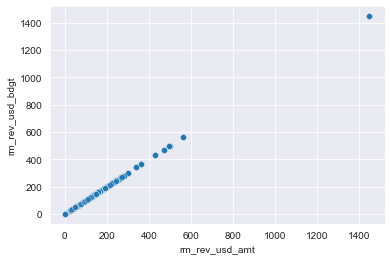

In [11]:
# Finding the relation between rm_rev_usd_amt and rm_rev_usd_bdgt
sns.scatterplot(x='rm_rev_usd_amt', y='rm_rev_usd_bdgt', data=df, alpha=0.7);

**rm_rev_usd_bdgt is not defined in the glossary and it is found to be almost exactly the same as rm_rev_usd_amt so we will drop it**

In [12]:
# dropping the columns mentioned above
df.drop(columns=['mnemonic_cd', 'count_as_stay', 'count_as_bkg',
        'rm_rev_amt', 'rm_rev_usd_bdgt', 'change'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103022 entries, 0 to 103021
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mem_id               103022 non-null  int64         
 1   mem_type             103022 non-null  object        
 2   email                103022 non-null  object        
 3   sms                  103022 non-null  object        
 4   mem_city             103022 non-null  object        
 5   mem_tier             103022 non-null  int64         
 6   booking_dt           103022 non-null  datetime64[ns]
 7   conf_dt              103022 non-null  datetime64[ns]
 8   ck_in_dt             103022 non-null  datetime64[ns]
 9   ck_out_dt            103022 non-null  datetime64[ns]
 10  rm_typ               103022 non-null  object        
 11  chain_cd             103022 non-null  object        
 12  hotel_cluster        103022 non-null  object        
 13  hotel_name    

In [14]:
# Saving the dataframe to csv for ARIMA modeling
df.to_csv('./data/data_eda.csv')

**Checking out some columns against revenue**

In [15]:
# Define a function to plot against both revenues
def plot_revenue(col, kind, xlabel):
    df.groupby(col).agg(tot_rev=('tot_sty_rev_usd_amt', 'sum'),
                        room_rev=('rm_rev_usd_amt', 'sum')).sort_values(by='tot_rev').plot(
        kind=kind, figsize=(20, 8), ylabel='Revenue', xlabel=xlabel, fontsize=14)
    plt.legend(loc='best', fontsize=16)
    return plt.show()

In [16]:
# Checking out revenues in different room types
df.groupby('rm_typ').agg(tot_rev=('tot_sty_rev_usd_amt', 'sum'),
                         room_rev=('rm_rev_usd_amt', 'sum')).sort_values(by='tot_rev')

,tot_rev,room_rev
rm_typ,,
CDXG,0.00,16667.84
CSHN,0.00,11781.28
CSPG,0.00,16667.84
TEES,0.00,0.00
OSBS,1013.60,0.00
...,...,...
XFTG,397360.32,336035.84
KFTN,484526.13,378338.54
KEXN,583856.00,451348.80


**We noticed 3 really interesting observations here.**
- CDXG, CSHN, CSPG recorded room revenue but 0 in total revenue
- OSBS recorded total revenue but 0 in room revenue
- TDBS, TSUG and KLON recorded higher room revenue than total revenue
- TEES recorded 0 in both room and total revenue

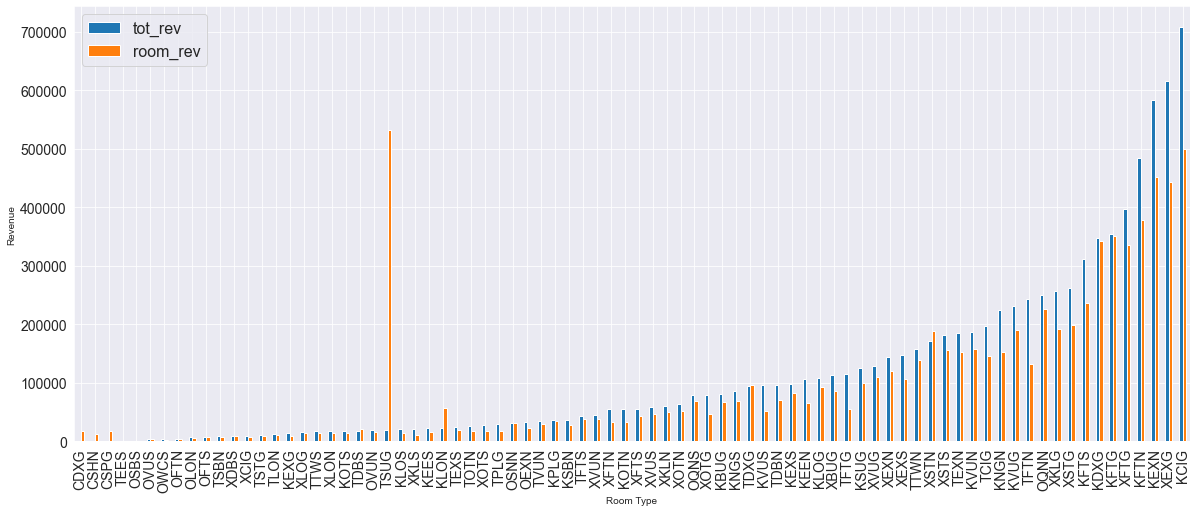

In [17]:
plot_revenue('rm_typ', 'bar', 'Room Type')

In [18]:
# Checking out revenues in cities
df.groupby('hotel_city').agg(tot_rev=('tot_sty_rev_usd_amt', 'sum'),
                             room_rev=('rm_rev_usd_amt', 'sum')).sort_values(by='tot_rev')

,tot_rev,room_rev
hotel_city,,
CHANGSHU,-1655.36,36395.52
JIUZHAIGOU,0.00,584869.60
ZHUHAI,0.00,19148.64
ZHANJIANG,401.82,0.00
MAANSHAN,19475.68,16868.32
SHAOXING,21034.72,18288.48
NANTONG,22033.76,16953.44
WUHU,22992.48,13627.04
CHANGZHOU,45671.36,27974.24


**Once again, we noticed some anomalies**
- Changshu recorded room revenue but negative in total revenue
- Jiuzhaigou and Zhuhai recorded room revenue but 0 in total revenue
- Zhanjiang recorded total revenue but 0 in room revenue
- Ningbo recorded higher room revenue than total revenue

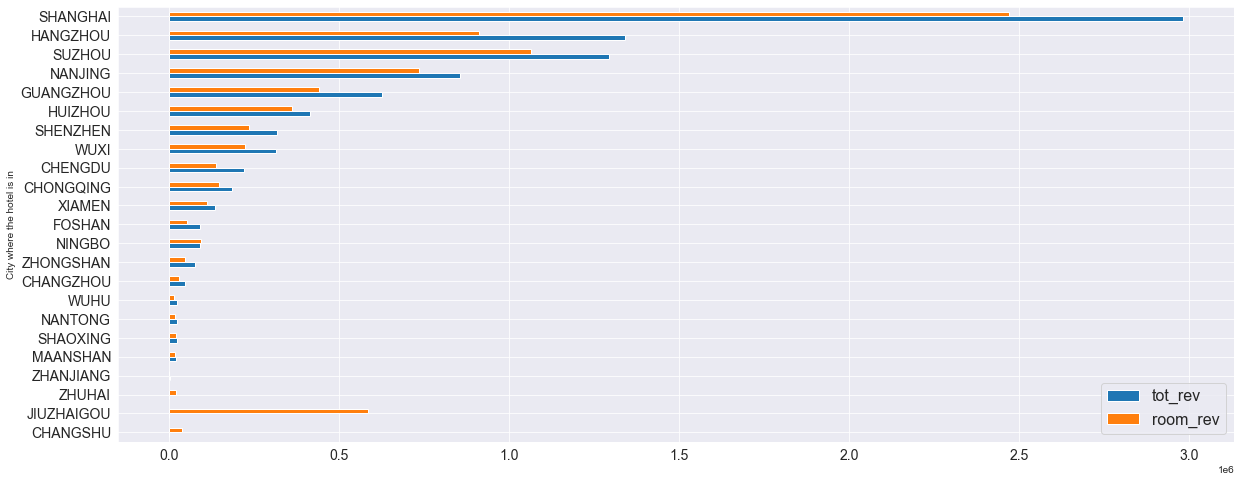

In [19]:
plot_revenue('hotel_city', 'barh', 'City where the hotel is in')

In [20]:
# Checking out revenues in different hotels
pd.options.display.max_rows = 100
df.groupby('hotel_name').agg(tot_rev=('tot_sty_rev_usd_amt', 'sum'),
                             room_rev=('rm_rev_usd_amt', 'sum')).sort_values(by='tot_rev')

,tot_rev,room_rev
hotel_name,,
Changshu Jordan,-1655.36,36395.52
Jiuzhai Rodman,0.00,11781.28
Jiuzhai Pippen,0.00,573088.32
Zhuhai Rodman,0.00,19148.64
Zhanjiang Jordan,401.82,0.00
Zhongshan Urban Jordan,724.64,0.00
Shanghai Grant VIII,3940.16,3674.72
Shanghai Grant IV,4510.24,3665.76
Shanghai Grant IX,7344.96,6816.32


**No surprises here, again, we notice some observations out of ordinary**
- Changshu Jordan recorded room revenue but negative in total revenue which coincides with the observation in the previous table
- Jiuzhai Rodman, Jiuzhai Pippen and Zhuhai Rodman recorded room revenue but 0 in total revenue which also coincide with the observation in the previous table
- Zhanjiang Jordan (also matching observation in the previous table) and Zhongshan Urban Jordan recorded total revenue but 0 in room revenue 
- Shanghai Grant V and Ningbo Jordan (matches observation in previous table) recorded higher room revenue than total revenue

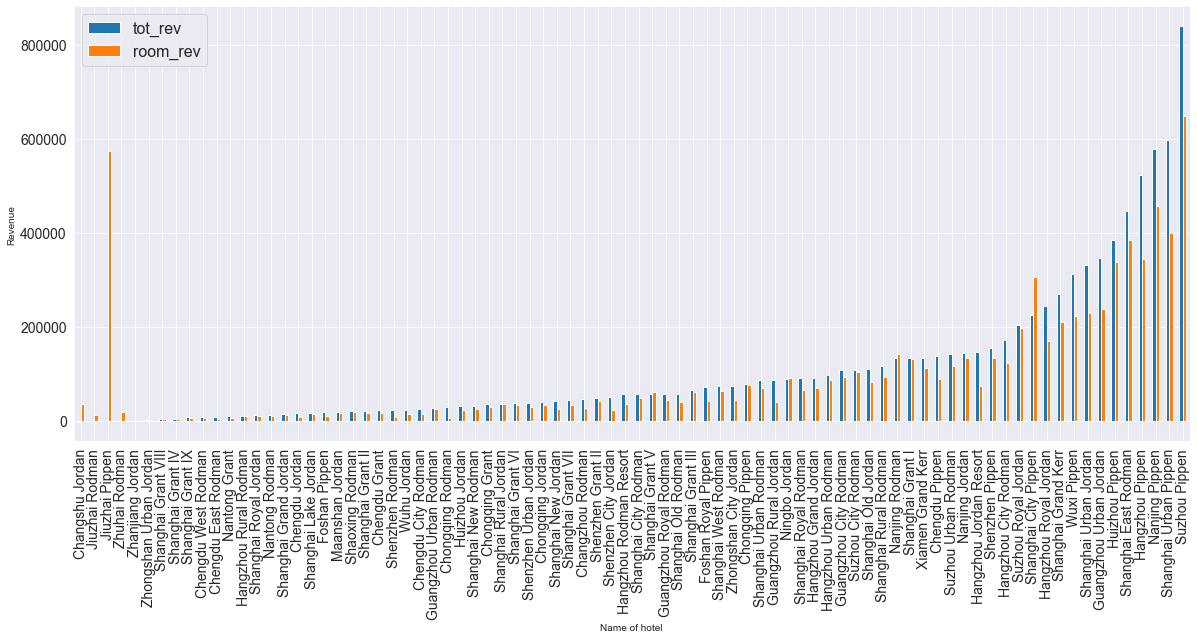

In [21]:
plot_revenue('hotel_name', 'bar', 'Name of hotel')

**There are 4 unusual observations altogether**
- Positive in room revenue, negative in total revenue
- Positive in room revenue, 0 in total revenue
- Higher room revenue than total revenue
- Positive in total revenue but 0 in room revenue

**From the glossary, room revenue is the revenue from the room booking portion only excluding all other expenses. We would assume that total revenue is the revenue that includes room booking and all other expenses like room service etc. The first 3 observations can be grouped together as room revenue higher than total revenue and the 4th observation, while uncommon, is still possible. Logically, total revenue should be equal to or higher than room revenue. We will assume that there is an error in data entry so we will impute all total revenue entries found in the first 3 observations with room revenue**

In [22]:
# Checking hotels with room revenue higher than total revenue
df[df['tot_sty_rev_usd_amt'] < df['rm_rev_usd_amt']][['hotel_name', 'tot_sty_rev_usd_amt', 'rm_rev_usd_amt']]

,hotel_name,tot_sty_rev_usd_amt,rm_rev_usd_amt
2,Jiuzhai Pippen,0.00,430.59
5,Suzhou City Rodman,14.04,19.04
10,Jiuzhai Pippen,0.00,298.28
13,Jiuzhai Pippen,0.00,430.59
20,Suzhou Urban Rodman,0.00,36.27
...,...,...,...
102992,Shanghai City Pippen,0.00,241.95
103008,Jiuzhai Pippen,0.00,148.82
103009,Jiuzhai Pippen,0.00,148.82
103013,Jiuzhai Rodman,0.00,105.19


In [23]:
# Imputing total revenue with room revenue where total revenue is lower than room revenue
df['tot_sty_rev_usd_amt'] = np.where(
    df['tot_sty_rev_usd_amt'] < df['rm_rev_usd_amt'], df['rm_rev_usd_amt'], df['tot_sty_rev_usd_amt'])

In [24]:
# Check to confirm imputation worked
pd.options.display.max_rows = 100
df.groupby('hotel_name').agg(tot_rev=('tot_sty_rev_usd_amt', 'sum'),
                             room_rev=('rm_rev_usd_amt', 'sum')).sort_values(by='tot_rev')

,tot_rev,room_rev
hotel_name,,
Zhanjiang Jordan,401.82,0.00
Zhongshan Urban Jordan,724.64,0.00
Shanghai Grant VIII,3940.16,3674.72
Shanghai Grant IV,4510.24,3665.76
Shanghai Grant IX,7344.96,6816.32
Chengdu West Rodman,7510.72,6530.72
Chengdu East Rodman,8570.24,3641.12
Nantong Grant,9465.12,6024.48
Hangzhou Rural Rodman,9721.60,9721.60


In [25]:
df[df['tot_sty_rev_usd_amt'] == 0][['hotel_name', 'nights_stayed', 'tot_sty_rev_usd_amt', 'rm_rev_usd_amt']]

,hotel_name,nights_stayed,tot_sty_rev_usd_amt,rm_rev_usd_amt
0,Shanghai Urban Jordan,1,0.0,0.0
3,Jiuzhai Pippen,2,0.0,0.0
9,Jiuzhai Pippen,2,0.0,0.0
15,Wuxi Pippen,1,0.0,0.0
16,Wuxi Pippen,1,0.0,0.0
...,...,...,...,...
102972,Shanghai Urban Jordan,1,0.0,0.0
102979,Guangzhou Urban Jordan,1,0.0,0.0
102998,Shanghai West Rodman,1,0.0,0.0
103016,Shanghai East Rodman,1,0.0,0.0


**We observed that there are many cases where customers did check in and stay but the hotel recorded 0 in room or both revenue which we thought is worth noting. One possible scenario we can come up with is that the customers redeemed their points from the loyalty program to offset the charges. We note the observation and will leave it as it is for now**

In [37]:
# Creating some columns for analysis later

# Creating a column lead_time by subtracting booking date from confirm date
df['lead_time'] = (df['conf_dt'] - df['booking_dt']).dt.days
# https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value

# Creating a year and a month column
df['year'] = df['ck_in_dt'].dt.year
df['month'] = df['ck_in_dt'].dt.month

# Confirm
df

,mem_id,mem_type,email,sms,mem_city,mem_tier,booking_dt,conf_dt,ck_in_dt,ck_out_dt,...,hotel_cluster,hotel_name,hotel_city,hotel_tier,nights_stayed,rm_rev_usd_amt,tot_sty_rev_usd_amt,lead_time,year,month
0,100000001,PLTN,N,Y,SHANGHAI,1,2012-07-26,2012-09-06,2012-09-07,2012-09-08,...,East,Shanghai Urban Jordan,SHANGHAI,1,1,0.00,0.00,42,2012,9
1,100000002,PLTN,N,Y,SHANGHAI,1,2012-07-26,2012-09-03,2012-09-07,2012-09-08,...,East,Shanghai Urban Jordan,SHANGHAI,1,1,94.51,179.57,39,2012,9
2,100000003,PLTN,Y,Y,CHONGQING,2,2012-08-22,2012-09-04,2012-09-14,2012-09-16,...,Special,Jiuzhai Pippen,JIUZHAIGOU,2,2,430.59,430.59,13,2012,9
3,100000004,PLTN,Y,Y,CHONGQING,2,2012-08-22,2012-09-04,2012-09-21,2012-09-23,...,Special,Jiuzhai Pippen,JIUZHAIGOU,2,2,0.00,0.00,13,2012,9
4,100000005,PLTN,Y,Y,CHENGDU,2,2012-07-26,2012-09-06,2012-09-07,2012-09-08,...,Special,Chengdu Pippen,CHENGDU,2,1,150.08,172.60,42,2012,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103017,100000917,PLTN,Y,Y,SHANGHAI,1,2012-09-07,2012-09-12,2012-09-12,2012-09-14,...,East,Wuxi Pippen,WUXI,2,2,110.38,174.19,5,2012,9
103018,100000918,GOLD,N,Y,GUANGZHOU,1,2012-09-26,2012-10-04,2012-10-05,2012-10-06,...,South,Guangzhou Rural Jordan,GUANGZHOU,1,1,36.01,44.34,8,2012,10
103019,100000919,GOLD,N,Y,GUANGZHOU,1,2012-11-06,2012-11-11,2012-11-12,2012-11-13,...,South,Zhongshan City Jordan,ZHONGSHAN,2,1,47.07,68.71,5,2012,11
103020,100000920,PLTN,Y,Y,GUANGZHOU,1,2012-09-25,2012-10-09,2012-10-26,2012-10-27,...,South,Guangzhou Urban Jordan,GUANGZHOU,1,1,49.04,53.17,14,2012,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103022 entries, 0 to 103021
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mem_id               103022 non-null  int64         
 1   mem_type             103022 non-null  object        
 2   email                103022 non-null  object        
 3   sms                  103022 non-null  object        
 4   mem_city             103022 non-null  object        
 5   mem_tier             103022 non-null  int64         
 6   booking_dt           103022 non-null  datetime64[ns]
 7   conf_dt              103022 non-null  datetime64[ns]
 8   ck_in_dt             103022 non-null  datetime64[ns]
 9   ck_out_dt            103022 non-null  datetime64[ns]
 10  rm_typ               103022 non-null  object        
 11  chain_cd             103022 non-null  object        
 12  hotel_cluster        103022 non-null  object        
 13  hotel_name    

In [38]:
# Saving dataframe to csv for later analysis use
df.to_csv('./data/data_pbi.csv')